# C1 
### Create an end user report in Power BI and an accompanying exploratory descriptive analysis walk-through with python in Jupyter notebook:
- Are there observable patterns in the __neighbourhoods__ people tend to hire cycles __from__ and where they cycle __to__?
- Can we see a __commuter__ trend, for example, or evidence of __students__ hiring cycles in term time?
- Are there any __outliers__ from the 'usual' journey that you spotted, and do you have plausible __explanations__ for this? Such as where clusters of businesses are located or traffic jammed streets.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
trip = pd.read_csv(r'C:\Users\Admin\Desktop\LBG Data Analyst Lab Materials\Project Weeks\project_data\Seattle_cycles_trip.csv')
station = pd.read_csv(r'C:\Users\Admin\Desktop\LBG Data Analyst Lab Materials\Project Weeks\project_data\Seattle_cycles_station.csv')
weather = pd.read_csv(r'C:\Users\Admin\Desktop\LBG Data Analyst Lab Materials\Project Weeks\project_data\Seattle_weather_daily.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_9628\2470151592.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  trip = pd.read_csv(r'C:\Users\Admin\Desktop\LBG Data Analyst Lab Materials\Project Weeks\project_data\Seattle_cycles_trip.csv')


In [4]:
trip.head(10)

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971
5,436,10/13/2014 10:34,10/13/2014 10:47,SEA00337,808.805,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1974
6,437,10/13/2014 11:35,10/13/2014 11:45,SEA00202,596.715,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Male,1978
7,438,10/13/2014 11:35,10/13/2014 11:45,SEA00311,592.131,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Male,1983
8,439,10/13/2014 11:35,10/13/2014 11:45,SEA00486,586.347,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Female,1974
9,440,10/13/2014 11:35,10/13/2014 11:45,SEA00434,587.634,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Male,1958


In [5]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286858 entries, 0 to 286857
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            286858 non-null  int64  
 1   starttime          286858 non-null  object 
 2   stoptime           286858 non-null  object 
 3   bikeid             286858 non-null  object 
 4   tripduration       286858 non-null  float64
 5   from_station_name  286858 non-null  object 
 6   to_station_name    286858 non-null  object 
 7   from_station_id    286858 non-null  object 
 8   to_station_id      286858 non-null  object 
 9   usertype           286858 non-null  object 
 10  gender             181558 non-null  object 
 11  birthyear          181554 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 26.3+ MB


In [6]:
trip.describe()

,trip_id,tripduration
count,286858.000000,286858.000000
mean,112431.781746,1178.354284
std,76565.086482,2038.697070
min,431.000000,60.008000
25%,43051.000000,387.925750
50%,103486.500000,624.846500
75%,179544.750000,1118.483250
max,255245.000000,28794.398000


In [7]:
station.head(10)

,station_id,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,10/13/2014,18,NaN,18,NaN
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,10/13/2014,16,NaN,16,NaN
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,10/13/2014,16,NaN,16,NaN
3,BT-05,2nd Ave & Blanchard St,47.613110,-122.344208,10/13/2014,14,NaN,14,NaN
4,CBD-03,7th Ave & Union St,47.610731,-122.332447,10/13/2014,20,NaN,20,NaN
5,CBD-04,Union St & 4th Ave,47.609221,-122.335596,7/27/2015,18,NaN,18,NaN
6,CBD-05,1st Ave & Marion St,47.604058,-122.335800,10/13/2014,20,NaN,20,NaN
7,CBD-06,2nd Ave & Spring St,47.605950,-122.335768,10/13/2014,20,11/9/2015,18,NaN
8,CBD-07,City Hall / 4th Ave & James St,47.603509,-122.330409,10/13/2014,20,NaN,20,NaN
9,CBD-13,2nd Ave & Pine St,47.610185,-122.339641,10/13/2014,18,NaN,18,NaN


In [8]:
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   station_id         58 non-null     object 
 1   name               58 non-null     object 
 2   lat                58 non-null     float64
 3   long               58 non-null     float64
 4   install_date       58 non-null     object 
 5   install_dockcount  58 non-null     int64  
 6   modification_date  17 non-null     object 
 7   current_dockcount  58 non-null     int64  
 8   decommission_date  4 non-null      object 
dtypes: float64(2), int64(2), object(5)
memory usage: 4.2+ KB


In [9]:
station.describe()

,lat,long,install_dockcount,current_dockcount
count,58.000000,58.000000,58.000000,58.000000
mean,47.624796,-122.327242,17.586207,16.517241
std,0.019066,0.014957,3.060985,5.117021
min,47.598488,-122.355230,12.000000,0.000000
25%,47.613239,-122.338735,16.000000,16.000000
50%,47.618591,-122.328206,18.000000,18.000000
75%,47.627712,-122.316691,18.000000,18.000000
max,47.666145,-122.284119,30.000000,26.000000


In [10]:
weather.head(10)

,Date,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,...,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Events
0,10/13/2014,71,62.0,54,55,51,46,87,68,46,...,29.79,29.65,10,10,4,13,4,21,0.00,Rain
1,10/14/2014,63,59.0,55,52,51,50,88,78,63,...,29.75,29.54,10,9,3,10,5,17,0.11,Rain
2,10/15/2014,62,58.0,54,53,50,46,87,77,67,...,29.71,29.51,10,9,3,18,7,25,0.45,Rain
3,10/16/2014,71,61.0,52,49,46,42,83,61,36,...,29.95,29.81,10,10,10,9,4,-,0.00,Rain
4,10/17/2014,64,60.0,57,55,51,41,87,72,46,...,29.78,29.73,10,10,6,8,3,-,0.14,Rain
5,10/18/2014,68,64.0,59,59,57,55,90,83,68,...,29.90,29.80,10,8,2,10,4,-,0.31,Rain
6,10/19/2014,73,64.0,55,57,55,53,94,74,52,...,29.73,29.67,10,10,6,10,3,18,0.00,NaN
7,10/20/2014,66,60.0,55,57,54,50,90,78,67,...,29.74,29.69,10,10,5,12,5,-,0.44,Rain
8,10/21/2014,64,58.0,55,52,49,46,87,70,58,...,29.85,29.74,10,10,6,15,8,21,0.10,Rain
9,10/22/2014,60,58.0,57,55,53,48,88,81,67,...,29.68,29.56,10,6,2,14,8,22,1.43,Rain


In [11]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        689 non-null    object 
 1   Max_Temperature_F           689 non-null    int64  
 2   Mean_Temperature_F          688 non-null    float64
 3   Min_TemperatureF            689 non-null    int64  
 4   Max_Dew_Point_F             689 non-null    int64  
 5   MeanDew_Point_F             689 non-null    int64  
 6   Min_Dewpoint_F              689 non-null    int64  
 7   Max_Humidity                689 non-null    int64  
 8   Mean_Humidity               689 non-null    int64  
 9   Min_Humidity                689 non-null    int64  
 10  Max_Sea_Level_Pressure_In   689 non-null    float64
 11  Mean_Sea_Level_Pressure_In  689 non-null    float64
 12  Min_Sea_Level_Pressure_In   689 non-null    float64
 13  Max_Visibility_Miles        689 non

In [12]:
weather.describe()

,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_Pressure_In,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Precipitation_In
count,689.000000,688.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.00000,689.000000
mean,64.027576,56.584302,49.454282,48.571843,45.021771,40.873730,84.541364,68.506531,49.973875,30.121742,30.034761,29.940610,9.989840,9.429608,7.245283,11.085631,4.63135,0.105065
std,12.427843,10.408058,9.451437,7.501230,7.914025,8.854608,9.718948,12.701871,15.825701,0.183367,0.197503,0.221803,0.266679,1.174360,3.281278,3.921087,2.78032,0.235644
min,39.000000,33.000000,23.000000,10.000000,4.000000,1.000000,40.000000,24.000000,15.000000,29.470000,29.310000,29.140000,3.000000,1.000000,0.000000,4.000000,0.00000,0.000000
25%,55.000000,48.000000,43.000000,44.000000,41.000000,36.000000,78.000000,60.000000,38.000000,30.010000,29.930000,29.840000,10.000000,9.000000,4.000000,8.000000,3.00000,0.000000
50%,63.000000,56.000000,50.000000,50.000000,46.000000,42.000000,86.000000,70.000000,50.000000,30.120000,30.040000,29.960000,10.000000,10.000000,9.000000,10.000000,4.00000,0.000000
75%,73.000000,65.000000,57.000000,54.000000,51.000000,47.000000,90.000000,79.000000,63.000000,30.240000,30.160000,30.080000,10.000000,10.000000,10.000000,13.000000,6.00000,0.090000
max,98.000000,83.000000,70.000000,77.000000,59.000000,57.000000,100.000000,95.000000,87.000000,30.860000,30.810000,30.750000,10.000000,10.000000,10.000000,30.000000,23.00000,2.200000


In [13]:
trip_id = ['Person' + str(i) for i in range (0,9)]
trip_id

['Person0',
 'Person1',
 'Person2',
 'Person3',
 'Person4',
 'Person5',
 'Person6',
 'Person7',
 'Person8']

In [14]:
trip.groupby('from_station_id').mean()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9628\2541985806.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  trip.groupby('from_station_id').mean()


,trip_id,tripduration
from_station_id,,
8D OPS 02,246672.500000,133.617500
BT-01,119412.202122,1396.320262
BT-03,105405.454334,1015.407497
BT-04,113135.186593,902.308044
BT-05,101641.642265,1199.735284
...,...,...
UW-10,101357.954220,2010.514092
UW-11,219631.769231,1345.875172
WF-01,123779.932511,2086.617697


In [15]:
trip.groupby(['from_station_id', 'to_station_id']).std()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9628\3922854254.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  trip.groupby(['from_station_id', 'to_station_id']).std()


trip_id  tripduration
from_station_id to_station_id                            
8D OPS 02       8D OPS 02          2.121320     60.489450
BT-01           BT-01          74617.397608   3568.467592
                BT-03          70833.933493   1639.668801
                BT-04          90008.277986    662.505529
                BT-05          72826.514748   1336.532631
...                                     ...           ...
WF-04           UW-10              0.707107      0.134350
                UW-11           4667.238230   3305.616083
                WF-01          80391.212775   1812.101417
                WF-03           3463.065558   1739.160226
                WF-04          79593.132123   3570.488530

[2943 rows x 2 columns]

In [16]:
focused_table = [trip.groupby(['from_station_id', 'to_station_id']).std()]
focused_table

C:\Users\Admin\AppData\Local\Temp\ipykernel_9628\1914647810.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  focused_table = [trip.groupby(['from_station_id', 'to_station_id']).std()]


[                                    trip_id  tripduration
 from_station_id to_station_id                            
 8D OPS 02       8D OPS 02          2.121320     60.489450
 BT-01           BT-01          74617.397608   3568.467592
                 BT-03          70833.933493   1639.668801
                 BT-04          90008.277986    662.505529
                 BT-05          72826.514748   1336.532631
 ...                                     ...           ...
 WF-04           UW-10              0.707107      0.134350
                 UW-11           4667.238230   3305.616083
                 WF-01          80391.212775   1812.101417
                 WF-03           3463.065558   1739.160226
                 WF-04          79593.132123   3570.488530
 
 [2943 rows x 2 columns]]

In [17]:
trip.groupby(['from_station_id', 'to_station_id']).count()

trip_id  starttime  stoptime  bikeid  \
from_station_id to_station_id                                         
8D OPS 02       8D OPS 02            2          2         2       2   
BT-01           BT-01              738        738       738     738   
                BT-03              221        221       221     221   
                BT-04              137        137       137     137   
                BT-05              470        470       470     470   
...                                ...        ...       ...     ...   
WF-04           UW-10                2          2         2       2   
                UW-11                5          5         5       5   
                WF-01             1930       1930      1930    1930   
                WF-03               17         17        17      17   
                WF-04             1358       1358      1358    1358   

                               tripduration  from_station_name  \
from_station_id to_station_id                                    
8D OPS 02       8D OPS 02                 2                  2   
BT-01           BT-01                   738                738   
                BT-03                   221                221   
                BT-04                   137                137   
                BT-05                   470                470   
...                                     ...                ...   
WF-04           UW-10                     2                  2   
                UW-11                     5                  5   
                WF-01                  1930               1930   
                WF-03                    17                 17   
                WF-04                  1358               1358   

                               to_station_name  usertype  gender  birthyear  
from_station_id to_station_id                                                
8D OPS 02       8D OPS 02                    2         2       0          0  
BT-01           BT-01                      738       738      75         75  
                BT-03                      221       221      47         47  
                BT-04                      137       137      83         83  
                BT-05                      470       470     101        101  
...                                        ...       ...     ...        ...  
WF-04           UW-10                        2         2       0          0  
                UW-11                        5         5       0          0  
                WF-01                     1930      1930     575        575  
                WF-03                       17        17       3          3  
                WF-04                     1358      1358      58         58  

[2943 rows x 10 columns]

In [18]:
grouped_trip = trip.groupby(['from_station_id', 'to_station_id']).count()

In [19]:
trip.groupby('from_station_id', 'to_station_id).get_group()

SyntaxError: unterminated string literal (detected at line 1) (1213773150.py, line 1)

In [20]:
neighbourhood_patterns = trip[['from_station_id', 'to_station_id']]
print (neighbourhood_patterns)

       from_station_id to_station_id
0               CBD-06         PS-04
1               CBD-06         PS-04
2               CBD-06         PS-04
3               CBD-06         PS-04
4               CBD-06         PS-04
...                ...           ...
286853           CH-09        CBD-06
286854           CH-08         ID-04
286855           CH-08         ID-04
286856           CH-08         ID-04
286857           CH-08         ID-04

[286858 rows x 2 columns]


In [21]:
neighbourhood_patterns = trip.groupby('from_station_id') ['to_station_id'].value_counts()
print (neighbourhood_patterns)

from_station_id  to_station_id
8D OPS 02        8D OPS 02           2
BT-01            CBD-13           1247
                 WF-04             899
                 WF-01             879
                 CBD-06            846
                                  ... 
WF-04            UW-10               2
                 CH-05               1
                 CH-06               1
                 CH-16               1
                 DPD-03              1
Name: to_station_id, Length: 2943, dtype: int64


<Axes: >

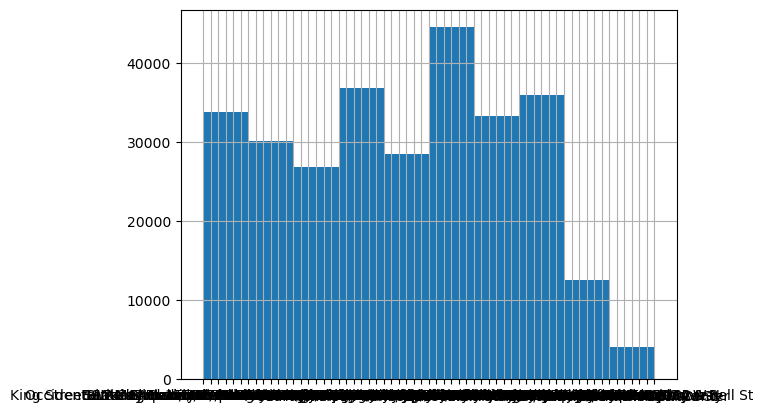

In [22]:
trip['from_station_name'].hist()

Text(0, 0.5, 'Frequency')

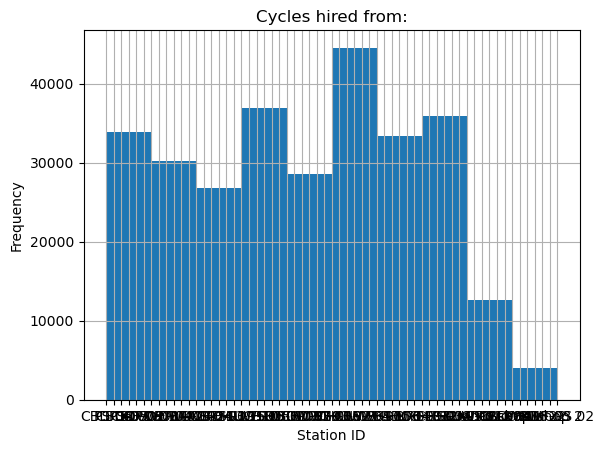

In [23]:
trip['from_station_id'].hist()
plt.title('Cycles hired from:')
plt.xlabel('Station ID')
plt.ylabel('Frequency')

In [24]:
 trip['from_station_name', 'to_station_name'].hist()

KeyError: ('from_station_name', 'to_station_name')

In [25]:
import matplotlib.pyplot as plt

In [26]:
fig, ax = plt.subplots (figsize = (10.2))

plt.scatter(trip['from_station_id'],
           trip['to_station_id']);

TypeError: Value after * must be an iterable, not float